# Proyek Analisis Data: Bike Sharing Dataset

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda  pada tahun 2011-2012, tahun manakah yang lebih unggul?
- Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
- Apakah musim (season) mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data
mengumpulkan dan memanggil seluruh data yang di butuhkan

#### memanggil tabel day.csv

In [2]:
day_dataFrame = pd.read_csv('data/day.csv')
day_dataFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### memanggil tabel hour.csv

In [3]:
hour_dataFrame = pd.read_csv('data/hour.csv')
hour_dataFrame.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing day_dataFrame

#### 1. menilai day_dataFrame 

In [4]:
day_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada day_dataFrame terdapat 1 tipe data yg tidak sesuai, yaitu  dteday. seharusnya menggunakan tipe data datetime, bukan object

##### Mengecek apakah ada missing value

In [5]:
day_dataFrame.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value pada day_dataFrame

##### Mengecek apakah ada data yang terduplikasi

In [6]:
print("Jumlah duplikasi: ", day_dataFrame.duplicated().sum())

Jumlah duplikasi:  0


#### 2. Menilai data hour_dataFrame

In [7]:
hour_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat 1 tipe data yg tidak sesuai, yaitu  dteday. seharusnya menggunakan tipe data datetime, bukan object

##### Mengecek apakah ada missing value

In [8]:
hour_dataFrame.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value pada day_dataFrame

##### Mengecek apakah ada data yang terduplikasi

In [9]:
print("Jumlah duplikasi: ", day_dataFrame.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

#### 1. Menghapus data yang tidak diperlukan
disini saya menghapus data "hour_dataFrame", karena data tsb tidak diperlukan, karena tidak sesuai dengan pertanyaan bisnis yang diusulkan

In [10]:
del hour_dataFrame

#### 2. Mengubah Judul pada kolom agar lebih mudah dibaca

In [11]:
# Mengubah nama judul kolom
day_dataFrame.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_conditions',
    'cnt': 'count'
}, inplace=True)

day_dataFrame.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_conditions,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 3. Mengubah tipe data dateday menjadi datetime

In [12]:
day_dataFrame['dateday'] = pd.to_datetime(day_dataFrame.dateday)

#### 4. Mengubah rentang nilai pada tabel menjadi keterangan

In [13]:
day_dataFrame['year'] = day_dataFrame['year'].map({
    0: 2011, 1: 2012
})
day_dataFrame['month'] = day_dataFrame['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_dataFrame['season'] = day_dataFrame['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_dataFrame['weekday'] = day_dataFrame['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_dataFrame['weather_conditions'] = day_dataFrame['weather_conditions'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_dataFrame.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_conditions,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 5. Mengubaha tipe data ke categorical

In [14]:
day_dataFrame['season'] = day_dataFrame.season.astype('category')
day_dataFrame['year'] = day_dataFrame.year.astype('category')
day_dataFrame['month'] = day_dataFrame.month.astype('category')
day_dataFrame['holiday'] = day_dataFrame.holiday.astype('category')
day_dataFrame['weekday'] = day_dataFrame.weekday.astype('category')
day_dataFrame['workingday'] = day_dataFrame.workingday.astype('category')
day_dataFrame['weather_conditions'] = day_dataFrame.weather_conditions.astype('category')

In [15]:
day_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             731 non-null    int64         
 1   dateday             731 non-null    datetime64[ns]
 2   season              731 non-null    category      
 3   year                731 non-null    category      
 4   month               731 non-null    category      
 5   holiday             731 non-null    category      
 6   weekday             731 non-null    category      
 7   workingday          731 non-null    category      
 8   weather_conditions  731 non-null    category      
 9   temp                731 non-null    float64       
 10  atemp               731 non-null    float64       
 11  hum                 731 non-null    float64       
 12  windspeed           731 non-null    float64       
 13  casual              731 non-null    int64         

## Exploratory Data Analysis (EDA)

### Explore Data day_dataFrame

In [16]:
day_dataFrame.describe()

,instant,dateday,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


berikut merupakan rangkuman parameter statistik dari data day_dataFrame.

#### demografi penyewa sepeda berdasarkan musim

In [17]:
day_dataFrame.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})  

C:\Users\ichsan\AppData\Local\Temp\ipykernel_6788\67436270.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_dataFrame.groupby(by='season').agg({


count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

berdasrkan data tersebut, kita memperoleh kesimpulan bahwa rata-rata penyewa sepeda tertinggi ada di musim gugur, sedangkan terendah ada di musim semi.

#### demografi penyewa sepeda berdasarkan tahun

In [18]:
day_dataFrame.groupby(by='year').agg({
    'count': ['max', 'min', 'mean', 'sum']
})  

C:\Users\ichsan\AppData\Local\Temp\ipykernel_6788\2596669629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_dataFrame.groupby(by='year').agg({


count                           
       max  min         mean      sum
year                                 
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

berdasrkan data tersebut, kita memperoleh kesimpulan bahwa rata-rata sewa sepeda pada 2012 lebih banyak dibandingkan dengan 2011.

#### demografi penyewa sepeda berdasarkan bulan

In [19]:
day_dataFrame.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\ichsan\AppData\Local\Temp\ipykernel_6788\2748483039.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_dataFrame.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

berdasarkan data tersebut, kita memperoleh kesimpulan bahwa juni merupakan bulan dengan rata-rata penyewa tertinggi dan januari adalah bulan dengan rata-rata penyewa terendah.

#### demografi penyewa sepeda berdasarkan bulan dan tahun

In [20]:
# Mengelompokkan penyewa sepeda berdasarkan kombinasi bulan dan tahun
day_dataFrame.groupby(by=['year', 'month']).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\ichsan\AppData\Local\Temp\ipykernel_6788\3618923825.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_dataFrame.groupby(by=['year', 'month']).agg({


count                           
             max   min         mean     sum
year month                                 
2011 Apr    5312   795  3162.333333   94870
     Aug    5895  1115  4409.387097  136691
     Dec    3940   705  2816.870968   87323
     Feb    2927  1005  1721.964286   48215
     Jan    1985   431  1231.903226   38189
     Jul    6043  3285  4559.387097  141341
     Jun    5515  3767  4783.733333  143512
     Mar    3239   605  2065.967742   64045
     May    5805  2633  4381.322581  135821
     Nov    4486  1495  3405.566667  102167
     Oct    5511   627  3984.225806  123511
     Sep    5423  1842  4247.266667  127418
2012 Apr    7460  1027  5807.466667  174224
     Aug    7865  4549  6919.451613  214503
     Dec    6606   441  3990.741935  123713
     Feb    5062  1529  3556.448276  103137
     Jan    4521  1301  3120.774194   96744
     Jul    8173  4459  6567.967742  203607
     Jun    8120  4127  6761.000000  202830
     Mar    8362  3194  5318.548387  164875
     May    8294  2843  6318.225806  195865
     Nov    6852  2277  5088.800000  152664
     Oct    8156    22  6414.225806  198841
     Sep    8714  4073  7285.766667  218573

disini kita dapat melihat bagaimana penyewaaan sepeda dengan rinci, berdasarkan bulan dan tahun.

#### demografi penyewa sepeda berdasarkan kondisi cuaca

In [21]:
day_dataFrame.groupby(by='weather_conditions').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\ichsan\AppData\Local\Temp\ipykernel_6788\4130662238.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_dataFrame.groupby(by='weather_conditions').agg({


count                           
                      max  min         mean      sum
weather_conditions                                  
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

berdasarkan data tersebut, kita memperoleh kesimpulan bahwa rata-rata penyewa sepeda tertinggi ada di kondisi cuaca saat cerah/sebagian berawan, sedangkan rata-rata terendah ada di kondisi cuaca saat gerimis/hujan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda  pada tahun 2011-2012, tahun manakah yang lebih unggul?

C:\Users\ichsan\AppData\Local\Temp\ipykernel_6788\1720361567.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_dataFrame.groupby(by=["month","year"]).agg({


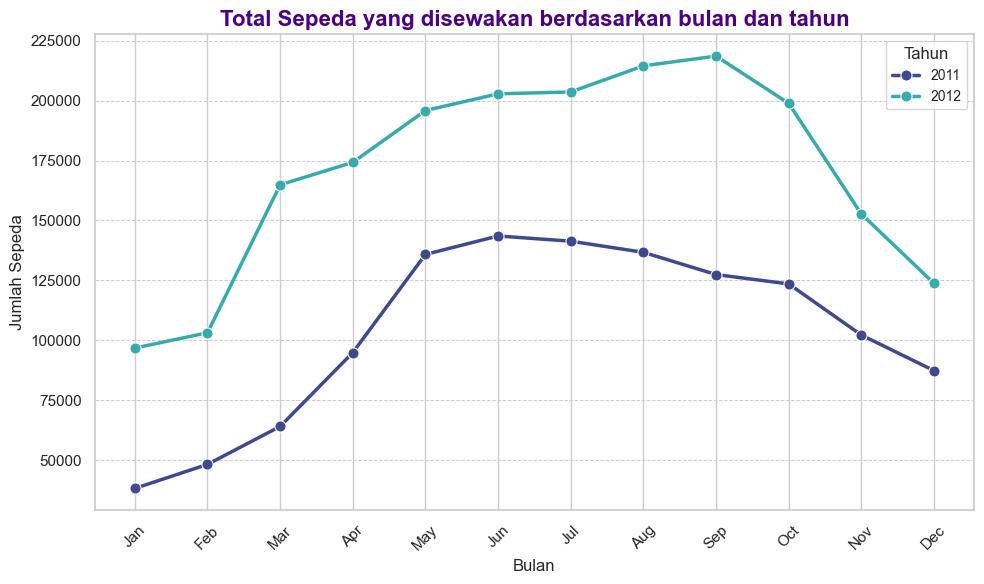

In [22]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="muted")

day_dataFrame['month'] = pd.Categorical(day_dataFrame['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_dataFrame.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="mako",
    marker="o",
    linewidth=2.5,
    markersize=8
)

plt.title("Total Sepeda yang disewakan berdasarkan bulan dan tahun", fontsize=16, weight='bold', color='#4B0082')
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Sepeda", fontsize=12)
plt.xticks(rotation=45)

plt.legend(title="Tahun", loc="upper right", fontsize=10, title_fontsize=12)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()

plt.show()

### Pertanyaan 2: Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda?

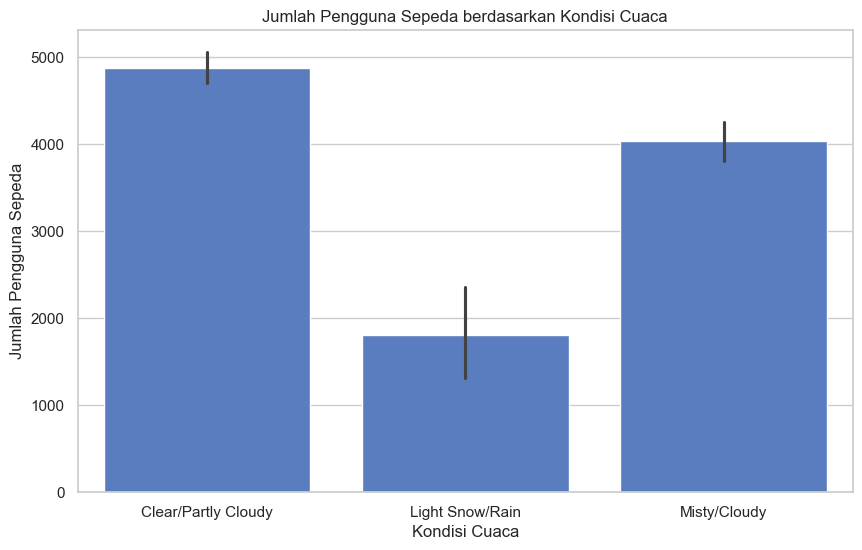

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_conditions',
    y='count',
    data=day_dataFrame)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 3: Apakah musim (season) mempengaruhi jumlah penyewaan sepeda?

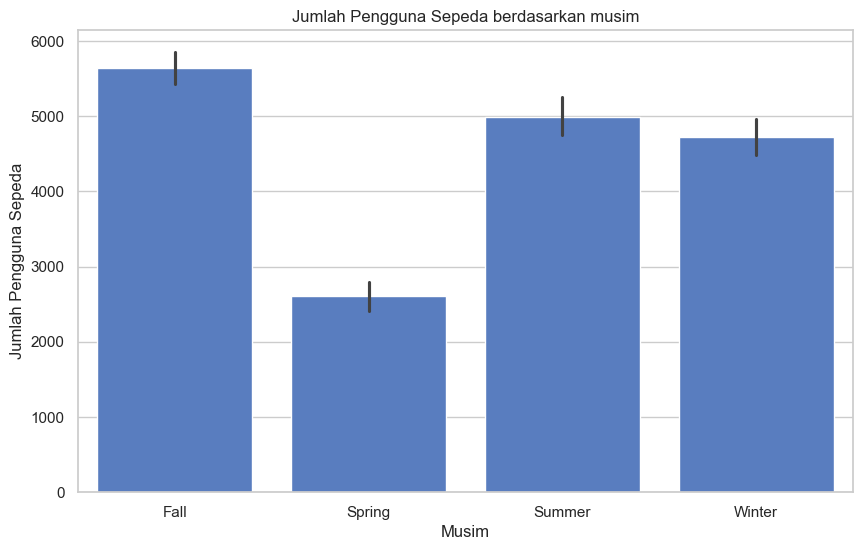

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='count',
    data=day_dataFrame)

plt.title('Jumlah Pengguna Sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

## Conclusion

1. Bagaimana tren penyewaan sepeda  pada tahun 2011-2012, tahun manakah yang lebih unggul?

Berdasarkan hasil visualisasi tersebut, pada tahun 2011 jumlah penyewaan terendah sepeda ada di bulan januari yaitu 38189 penyewa dan jumlah penyewaan tertinggi ada di bulan juni yaitu 143512. sedangkan pada tahun 2012, jumlah penyewaan sepeda terendah ada di bulan januari yaitu 96744 dan jumlah penyewaan tertinggi ada di bulan sepetember yaitu 218573. berdasarkan grafik tersebut, dapat diambil kesimpulan bahwa penyewaan sepeda pada tahun 2012 lebih unggul dibandingkan dengan tahun 2011.

2. Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda?

Ya, Kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Berdasarkan visualisasi data, penyewaan paling tinggi terjadi saat cuaca cerah atau sedikit berawan. Kondisi berkabut atau mendung menempati urutan kedua, sementara itu penyewaan paling sedikit terjadi pada saat cuaca sedang hujan atau bersalju.

3. Apakah musim (season) mempengaruhi jumlah penyewaan sepeda?
Ya, Kondisi musim juga memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Berdasarkan visualisasi data diatas, penyewaan paling tinggi terjadi saat musim gugur. Musim panas menempati urutan kedua, musim dingin menempati urutan ketiga, sementara itu musim semi memiliki jumlah penyewaan paling rendah.

convert to csv

In [25]:
day_dataFrame.to_csv("main_data.csv", index=False)